In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 로그 데이터를 가져온다

In [193]:
df=pd.read_csv(r'train\classify\train\results.csv')
df

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,1349.43,1.04400,0.525,1,1.18060,0.003312,0.003312,0.003312
1,2,2622.23,0.84798,0.350,1,1.97914,0.006624,0.006624,0.006624
2,3,4057.68,0.86352,0.400,1,1.34494,0.009913,0.009913,0.009913
3,4,5267.84,0.86302,0.425,1,1.17752,0.009901,0.009901,0.009901
4,5,6488.46,0.79978,0.400,1,1.49553,0.009868,0.009868,0.009868
...,...,...,...,...,...,...,...,...,...
115,116,175712.00,0.31547,0.525,1,1.58767,0.006205,0.006205,0.006205
116,117,178201.00,0.31570,0.525,1,1.58527,0.006172,0.006172,0.006172
117,118,180142.00,0.30774,0.525,1,1.58062,0.006139,0.006139,0.006139
118,119,181464.00,0.32658,0.525,1,1.57818,0.006106,0.006106,0.006106


In [194]:
del df['metrics/accuracy_top5']

# epoch와 train/loss, metrics/accuracy_top1, val/loss 간의 상관관계(변화 추세)를 분석한다

In [195]:
corr=df.corr()[['train/loss','metrics/accuracy_top1','val/loss']]
corr=pd.DataFrame(corr.iloc[0,:]).T
corr

,train/loss,metrics/accuracy_top1,val/loss
epoch,-0.926723,0.545511,0.370159


In [196]:
# 상관계수 값을 퍼센트(%) 형태로 보기 쉽게 변환
corr_percent = (corr * 100)

corr_percent


,train/loss,metrics/accuracy_top1,val/loss
epoch,-92.67225,54.551143,37.015871


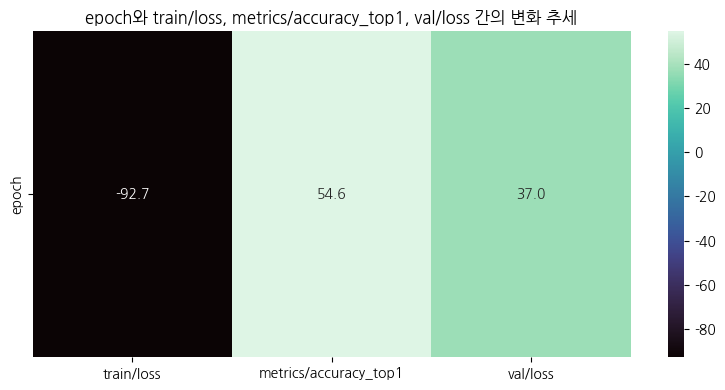

In [197]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_percent, annot=True, cmap='mako', fmt=".1f")
plt.title("epoch와 train/loss, metrics/accuracy_top1, val/loss 간의 변화 추세")
plt.tight_layout()
plt.show()

# 각 epoch 마다다 train/loss, metrics/accuracy_top1, val/loss 확인

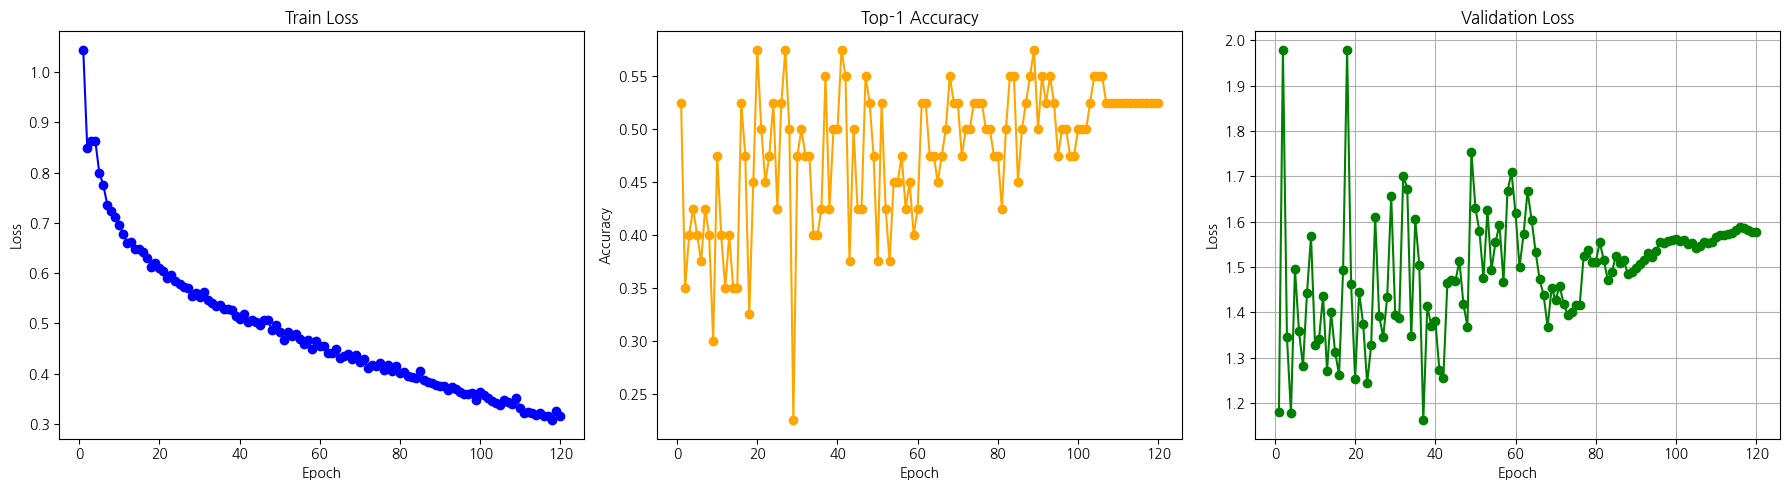

In [198]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(df['epoch'], df['train/loss'], marker='o', color='blue')
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(df['epoch'], df['metrics/accuracy_top1'], marker='o', color='orange')
axes[1].set_title('Top-1 Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

axes[2].plot(df['epoch'], df['val/loss'], marker='o', color='green')
axes[2].set_title('Validation Loss')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [199]:
df['day']=df['time']//(60*60*24)
df['hour'] = df['time']%(60*60*24)//(60*60)
df['minute'] = df['time']%(60*60)//60
df['second'] = df['time']%60
df

,epoch,time,train/loss,metrics/accuracy_top1,val/loss,lr/pg0,lr/pg1,lr/pg2,day,hour,minute,second
0,1,1349.43,1.04400,0.525,1.18060,0.003312,0.003312,0.003312,0.0,0.0,22.0,29.43
1,2,2622.23,0.84798,0.350,1.97914,0.006624,0.006624,0.006624,0.0,0.0,43.0,42.23
2,3,4057.68,0.86352,0.400,1.34494,0.009913,0.009913,0.009913,0.0,1.0,7.0,37.68
3,4,5267.84,0.86302,0.425,1.17752,0.009901,0.009901,0.009901,0.0,1.0,27.0,47.84
4,5,6488.46,0.79978,0.400,1.49553,0.009868,0.009868,0.009868,0.0,1.0,48.0,8.46
...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,175712.00,0.31547,0.525,1.58767,0.006205,0.006205,0.006205,2.0,0.0,48.0,32.00
116,117,178201.00,0.31570,0.525,1.58527,0.006172,0.006172,0.006172,2.0,1.0,30.0,1.00
117,118,180142.00,0.30774,0.525,1.58062,0.006139,0.006139,0.006139,2.0,2.0,2.0,22.00
118,119,181464.00,0.32658,0.525,1.57818,0.006106,0.006106,0.006106,2.0,2.0,24.0,24.00


In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
model=LinearRegression()
model.fit(df[['epoch']],df['time'])
df

,epoch,time,train/loss,metrics/accuracy_top1,val/loss,lr/pg0,lr/pg1,lr/pg2,day,hour,minute,second
0,1,1349.43,1.04400,0.525,1.18060,0.003312,0.003312,0.003312,0.0,0.0,22.0,29.43
1,2,2622.23,0.84798,0.350,1.97914,0.006624,0.006624,0.006624,0.0,0.0,43.0,42.23
2,3,4057.68,0.86352,0.400,1.34494,0.009913,0.009913,0.009913,0.0,1.0,7.0,37.68
3,4,5267.84,0.86302,0.425,1.17752,0.009901,0.009901,0.009901,0.0,1.0,27.0,47.84
4,5,6488.46,0.79978,0.400,1.49553,0.009868,0.009868,0.009868,0.0,1.0,48.0,8.46
...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,175712.00,0.31547,0.525,1.58767,0.006205,0.006205,0.006205,2.0,0.0,48.0,32.00
116,117,178201.00,0.31570,0.525,1.58527,0.006172,0.006172,0.006172,2.0,1.0,30.0,1.00
117,118,180142.00,0.30774,0.525,1.58062,0.006139,0.006139,0.006139,2.0,2.0,2.0,22.00
118,119,181464.00,0.32658,0.525,1.57818,0.006106,0.006106,0.006106,2.0,2.0,24.0,24.00


In [202]:
def GetDay(epoch):
    time=model.predict([[epoch]])[0]
    day=time//(60*60*24)
    hour = time%(60*60*24)//(60*60)
    minute = time%(60*60)//60
    second = time%60
    return day, hour, minute, second


In [203]:
days=[]
hours=[]
minutes=[]
seconds=[]
epochs=range(1,301)
for i in epochs:
    day,hour,minute,second=GetDay(i)
    days.append(day)
    hours.append(hour)
    minutes.append(minute)
    seconds.append(second)
df=pd.DataFrame({'일':days,'시간':hours,'분':minutes,'초초':seconds},index=epochs)
df.index.name='epoch'
df


c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\anyou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line

,일,시간,분,초초
epoch,,,,
1,0.0,0.0,5.0,57.708832
2,0.0,0.0,30.0,46.526233
3,0.0,0.0,55.0,35.343633
4,0.0,1.0,20.0,24.161034
5,0.0,1.0,45.0,12.978434
...,...,...,...,...
296,5.0,2.0,5.0,58.842004
297,5.0,2.0,30.0,47.659405
298,5.0,2.0,55.0,36.476805
